Projet consitant a la Prédiction des prix des logements à Boston. Le fichier BostonHousing.csv contient 
des informations recueillies par le Bureau du recensement des États-Unis concernant 
le logement dans la région de Boston, Massachusetts

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
data = pd.read_csv('../Data/BostonHousing.csv')

In [22]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


Le fichier BostonHousing.csv contient des données sur les logements dans la région de Boston. Voici les noms des colonnes et leur signification en français :

CRIM : Taux de criminalité par habitant.
ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
INDUS : Proportion de la surface occupée par des activités non commerciales.
CHAS : Variable fictive indiquant si le tracé longe la rivière Charles (1) ou non (0).
NOX : Concentration en oxydes d'azote (parties par 10 millions).
RM : Nombre moyen de pièces par logement.
AGE : Proportion de logements construits avant 1940.
DIS : Distance pondérée aux cinq principaux centres d'emploi de Boston.
RAD : Indice d'accessibilité aux autoroutes radiales.
TAX : Taux d'imposition foncière par 10 000 dollars.
PTRATIO : Ratio élèves/enseignant par ville.
LSTAT : Pourcentage de la population d'origine étrangère.
MEDV : Valeur médiane des logements occupés par leur propriétaire (en milliers de dollars).
CAT. MEDV : Variable catégorielle indiquant si la valeur médiane est supérieure à 30 000 dollars (1) ou non (0).

In [23]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.542688,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197494,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


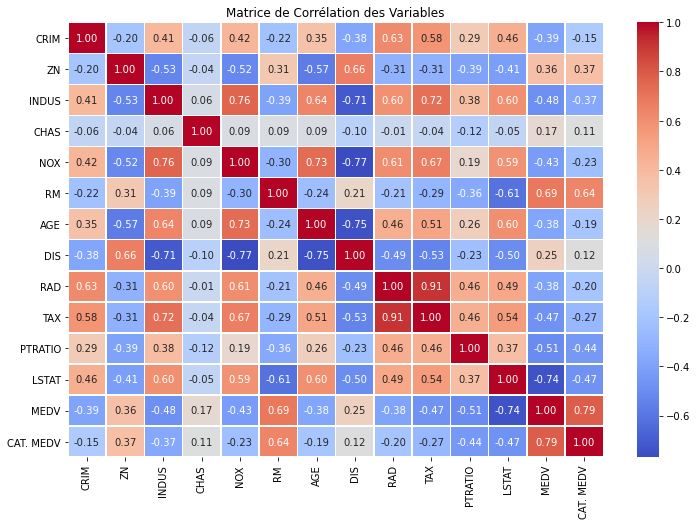

In [25]:
# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables")
plt.show()


## Analyse Préliminaire des Données
Il n'y a aucune valeur manquante dans le dataset.

### Statistiques générales : 
MEDV (prix médian des logements) a une moyenne de 22 542 dollars et une valeur maximale de 50 000 $.
Certaines variables ont des écarts-types élevés (CRIM, TAX, RAD), ce qui indique des variations importantes entre les valeurs.

## Corrélation des Variables
La matrice de corrélation montre des relations intéressantes :

MEDV (prix des logements) est fortement corrélé avec RM (+0.7) (plus de pièces = prix plus élevé).
LSTAT et MEDV sont négativement corrélés (-0.74) (quartiers défavorisés ont des prix plus bas).
TAX et RAD sont fortement corrélés (+0.91), ce qui peut indiquer une relation entre infrastructures et taxes locales.

In [32]:
# Sélection des features et de la cible
X = data.drop(columns=["MEDV", "CAT. MEDV"])  # Facteurs explicatifs
y = data["MEDV"]  # Variable cible



In [34]:
# Division des données en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

train_set.to_csv("../Data/train_set.csv", index=False)
test_set.to_csv("../Data/test_set.csv", index=False)


In [44]:
# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des valeurs réelles et prédites

print("Valeurs réelles (y_test):", y_test)
print("Valeurs prédites (y_pred):", y_pred)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


mse, r2

Valeurs réelles (y_test): 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64
Valeurs prédites (y_pred): [28.9656786  36.29067834 14.10705468 25.06654617 17.61052026 23.29314485
 17.43162676 13.70229843 22.01714502 20.33528083 24.76392777 18.3762628
 -4.3505385  21.57018936 19.33306237 25.20692592 20.50055757  4.57053431
 40.32882719 16.26600276 27.26384822 30.0100726  11.52719214 24.15659201
 17.6037016  15.29710047 22.61390828 17.89730736 22.53599437 18.92621577
 22.39479981 25.17927914 24.40155608 17.0178154  16.31300411 17.87193048
 31.27089738 20.18513275 23.9809031  24.7269096  13.53737505 32.24954783
 42.52332834 17.26219771 27.39622436 15.85139375 14.42027044 25.90939466
 19.12558918 30.00885042 21.0197939  34.28496298 15.80811196 26.12515441
 39.30669739 21.57431604 17.59316495 32.81698535 25.06270689 12.7480784
 22.45618042 30.41577839 31.55156465 17.2257668

(22.795970005996594, 0.6891477703235378)

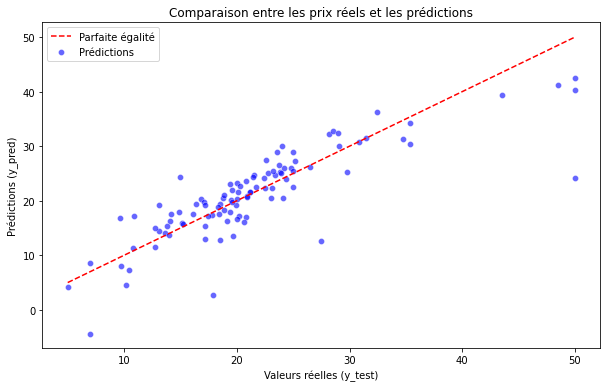

In [42]:
# Afficher un graphique des valeurs réelles vs. prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Parfaite égalité")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Comparaison entre les prix réels et les prédictions")
plt.legend()
plt.show()

## Résultats de la Régression Linéaire
Erreur quadratique moyenne (MSE) : 22.80
→ En moyenne, le modèle se trompe d’environ 4.77 (√22.80) milliers de dollars.
RScore 𝑅^2
R^2: 0.69
→ Notre modèle explique 68.9% de la variance des prix des logements.

Ces résultats montrent que le modèle est assez performant, mais il peut être amélioré.